In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.word2vec import PathLineSentences, LineSentence, Word2Vec
from pathlib import Path
import networkx as nx
from sklearn import model_selection, linear_model, preprocessing, svm
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
%matplotlib inline


**Load random walks from output files**

The word2vec model requires sentences of strings, so we convert node number to a string.

In [10]:
rw_location = Path("/Users/Ganymedian/Desktop/dynamic-rw/karate-wl/ar")
methods = ["m1", "m2", "m3", "m4"]
# methods = ["m1", "m2", "m3"]
nmethods = len(methods)
vertices = []
for i in range(34):
    vertices.append("v"+str(i+1))
# v = vertices[0]
# v="v30"

num_runs = 5

In [3]:
# G = nx.karate_club_graph()

G = nx.read_edgelist("/Users/Ganymedian/Desktop/Projects/stellar-random-walk-research/randomwalk/src/test/resources/karate.txt", nodetype=int)
# G = nx.read_edgelist("/Users/Ganymedian/Desktop/dynamic-rw/facebook_combined.txt", nodetype=int)
n_nodes = G.number_of_nodes()
A = nx.adjacency_matrix(G,nodelist=sorted(G.nodes())).toarray()
d_w = A.sum(axis=1)
M_theory = A.T / d_w
# print(M_theory)
# print(M_theory.T)

In [ ]:
def read_walks(v):
    random_walks_int = []

    for m in methods:
        fname = m
        if m != "m1":
            fname = fname+"-"+v
#         print(fname)
        rws = np.concatenate([
            np.loadtxt(f.open(), delimiter='\t', dtype=int)
            for f in rw_location.glob(fname+"-*/part-00000")
            if f.stat().st_size > 0
        ])
#         print(rws.shape)
        random_walks_int.append(rws)
    return random_walks_int
    #     random_walks_str = [list(map(str, v)) for v in random_walks_int]

In [ ]:
def extract_runs(random_walks_int):
    all_runs = []
#     print(num_runs)
    for i in range(nmethods):
        ars = np.vsplit(random_walks_int[i], 5)
        print(ars[0].shape)
        all_runs.append(ars)
    return all_runs


Calculate empirical transition probabilities

In [ ]:
all_runs = extract_runs(read_walks(v))

In [ ]:
wLength = 6
bucket = 5
formats=['.-', '^-', '*-','x-']
for mm in range(nmethods):
    all_errors = []
    for rr in range(num_runs):
        errors = []
        x_axis = []
        for ii in range(wLength//bucket):
            walk_length = 5*(ii + 1)

            M_empirical = np.zeros((n_nodes, n_nodes))
            for walk in all_runs[mm][rr]:
                for kk in range(walk_length - 1):
                    M_empirical[walk[kk] - 1, walk[kk + 1] - 1] += 1

            n_samples = M_empirical.sum()
            M_empirical = M_empirical.T / np.maximum(M_empirical.sum(axis=1), 1)

            errors.append(np.abs(M_theory - M_empirical).mean())
            x_axis.append(n_samples)
        all_errors.append(errors)
    n = len(all_errors)
    means = np.mean(all_errors,axis=0)
#     print(means)
    stdv = np.std(all_errors, axis=0)
    stderr = stdv/np.sqrt(n)
    plt.errorbar(x_axis, means, yerr=stderr, fmt=formats[mm], label=methods[mm], ms=15)
    plt.legend()
plt.show
# plt.plot(x_axis, all_errors, '.-')

Plot for adding different vertices

In [4]:
def read_walks(m, v, wl, nw):
    fname = m + "-wl" + str(wl) + "-nw" + str(nw)
    if m != "m1":
        fname = fname+"-"+v
#     print(fname)
    rws = np.concatenate([
        np.loadtxt(f.open(), delimiter='\t', dtype=int)
        for f in rw_location.glob(fname+"-*/part-00000")
        if f.stat().st_size > 0
    ])
#     print(rws.shape)
    ars = np.vsplit(rws, 5)
#     print(ars[0].shape)
    return ars
    #     random_walks_str = [list(map(str, v)) for v in random_walks_int]

m1
m2
m3
m4


<function matplotlib.pyplot.show>

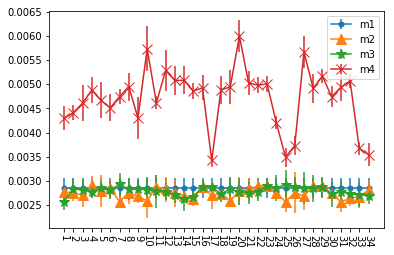

In [12]:
wLength = 3
nw = 100
formats=['.-', '^-', '*-','x-']
walk_length = wLength
rw_location = Path("/Users/Ganymedian/Desktop/dynamic-rw/karate-l3-w100/ar")
x_axis = []
for vv in range(34):
    x_axis.append(vv+1)
for mm in range(nmethods):
    print(methods[mm])
    all_errors = []
    for vv in range(34):
        v = "v"+str(vv+1)
#         print("reading vertex " + v)
        runs = read_walks(methods[mm], v, walk_length, nw)
        errors = []
        for rr in range(num_runs):
            M_empirical = np.zeros((n_nodes, n_nodes))
            for walk in runs[rr]:
                for kk in range(walk_length - 1):
                    M_empirical[walk[kk] - 1, walk[kk + 1] - 1] += 1

            n_samples = M_empirical.sum()
            M_empirical = M_empirical.T / np.maximum(M_empirical.sum(axis=1), 1)

            errors.append(np.abs(M_theory - M_empirical).mean())
        if (methods[mm] == "m1"):
            for vv in range(34):
                all_errors.append(errors)
            break;
        all_errors.append(errors)
    n = len(all_errors)
#     print(all_errors)
#     print(n)
    means = np.mean(all_errors,axis=1)
#     print(means)
    stdv = np.std(all_errors, axis=1)
#     stderr = stdv/np.sqrt(n)
    stderr = stdv
    plt.errorbar(x_axis, means, yerr=stderr, fmt=formats[mm], label=methods[mm], ms=10)
    plt.xticks(x_axis, rotation=-90)
    plt.legend()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.show
# plt.plot(x_axis, all_errors, '.-')

Increasing walk length

In [ ]:
def read_walks(m, v, wl,nw):
    fname = m + "-wl" + str(wl) + "-nw" + str(nw)
    if m != "m1":
        fname = fname+"-"+v
    print(fname)
    rws = np.concatenate([
        np.loadtxt(f.open(), delimiter='\t', dtype=int)
        for f in rw_location.glob(fname+"-*/part-00000")
        if f.stat().st_size > 0
    ])
#     print(rws.shape)
    ars = np.vsplit(rws, num_runs)
#     print(ars[0].shape)
    return ars
    #     random_walks_str = [list(map(str, v)) for v in random_walks_int]

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
num_runs = 1
rw_location = Path("/Users/Ganymedian/Desktop/dynamic-rw/fb/ar")
methods = ["m1", "m2", "m3", "m4"]
# methods = ["m1", "m2", "m3"]
nmethods = len(methods)
num_walk = 50
# walk_lengths = [3,5,10,20]
walk_lengths = [100]
formats=['.-', '^-', '*-','x-']

x_axis = walk_lengths
v = "v0"
for mm in range(nmethods):
    all_errors = []
    for ww in walk_lengths:
        print("reading walk length " + str(ww))
        runs = read_walks(methods[mm], v, ww, nw)
        errors = []
        for rr in range(num_runs):
            M_empirical = np.zeros((n_nodes, n_nodes))
            for walk in runs[rr]:
                for kk in range(ww - 1):
                    M_empirical[walk[kk] - 1, walk[kk + 1] - 1] += 1

            n_samples = M_empirical.sum()
            M_empirical = M_empirical.T / np.maximum(M_empirical.sum(axis=1), 1)

            errors.append(np.abs(M_theory - M_empirical).max())

        all_errors.append(errors)
    n = len(all_errors)
#     print(n)
    means = np.mean(all_errors,axis=1)
#     print(means)
    stdv = np.std(all_errors, axis=1)
    stderr = stdv/np.sqrt(n)
    plt.errorbar(x_axis, means, yerr=stderr, fmt=formats[mm], label=methods[mm], ms=10)
    plt.xticks(x_axis, rotation=-90)
    plt.legend()

plt.show
# plt.plot(x_axis, all_errors, '.-')

Increasing number of walks

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

wl = 20
num_walks = [3,5,10,20,50]
formats=['.-', '^-', '*-','x-']

x_axis = num_walks
v = "v1"
for mm in range(nmethods):
    all_errors = []
    for nw in num_walks:
        print("reading number of walks " + str(nw))
        runs = read_walks(methods[mm], v, wl, nw)
        errors = []
        for rr in range(num_runs):
            M_empirical = np.zeros((n_nodes, n_nodes))
            for walk in runs[rr]:
                for kk in range(wl - 1):
                    M_empirical[walk[kk] - 1, walk[kk + 1] - 1] += 1

            n_samples = M_empirical.sum()
            M_empirical = M_empirical.T / np.maximum(M_empirical.sum(axis=1), 1)

            errors.append(np.abs(M_theory - M_empirical).max())

        all_errors.append(errors)
    n = len(all_errors)
#     print(n)
    means = np.mean(all_errors,axis=1)
#     print(means)
    stdv = np.std(all_errors, axis=1)
    stderr = stdv/np.sqrt(n)
    plt.errorbar(x_axis, means, yerr=stderr, fmt=formats[mm], label=methods[mm], ms=10)
    plt.xticks(x_axis, rotation=-90)
    plt.legend()

plt.show
# plt.plot(x_axis, all_errors, '.-')

Degrees

In [ ]:
x = sorted(G.nodes())
d = d_w
plt.plot(x, d, '.-',label='degree')
plt.xticks(x_axis, rotation=-90)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.show

In [ ]:
nx.draw(G, with_labels = True)

Plotting number of computation steps

In [ ]:
def read_steps(m, wl):
    fname = m + "-steps-to-compute" + "-wl" + str(wl) + ".txt"
#     fname = m + "-walkers-to-compute" + "-wl" + str(wl) + ".txt"
    print(fname)
    rws = np.concatenate([
        np.loadtxt(f.open(), delimiter='\t', dtype=int)
        for f in rw_location.glob(fname)
        if f.stat().st_size > 0
    ])
#     print(rws.shape)
#     ars = np.vsplit(rws, 5)
#     print(ars[0].shape)
    return rws
    #     random_walks_str = [list(map(str, v)) for v in random_walks_int]

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

methods = ["m1", "m2", "m3", "m4"]
rw_location = Path("/Users/Ganymedian/Desktop/dynamic-rw/karate-wl/")
walk_lengths = [3,5,10,20]
formats=['.-', '^-', '*-','x-']

x_axis = walk_lengths
for mm in range(len(methods)):
    means = []
    errors = []
    for ww in walk_lengths:
        print("reading walk length " + str(ww))
        runs = read_steps(methods[mm], ww)[1:]

        n = len(runs)
#         print(n)
        mean = np.mean(runs,axis=0)[0]
        stdv = np.std(runs, axis=0)[0]
        stderr = stdv/np.sqrt(n)
        means.append(mean)
        errors.append(stderr)
    plt.errorbar(x_axis, means, yerr=errors, fmt=formats[mm], label=methods[mm], ms=15)
    plt.xticks(x_axis, rotation=-90)
    plt.legend()

plt.show
# plt.plot(x_axis, all_errors, '.-')

In [ ]:
errors_nw = []
x_axis_nw = []
walk_length = random_walks_int.shape[1]
for ii in range(20):
    #walk_length = 5*(ii + 1)
    #walk_lengths.append(walk_length)
    
    num_walks = 5*(ii + 1)

    reduced_walks = []
    for kk in range(1, n_nodes+1):
        reduced_walks.append(
            random_walks_int[random_walks_int[:, 0] == kk][:num_walks]
        )
    reduced_walks = np.concatenate(reduced_walks)
    
    M_empirical = np.zeros((n_nodes, n_nodes))
    for walk in reduced_walks:
        for kk in range(walk_length - 1):
            M_empirical[walk[kk] - 1, walk[kk + 1] - 1] += 1
    n_samples = M_empirical.sum()
    M_empirical = M_empirical.T / np.maximum(M_empirical.sum(axis=1), 1)

    errors_nw.append(np.abs(M_theory - M_empirical).max())
    x_axis_nw.append(n_samples)

plt.plot(x_axis_nw, errors_nw, '.-')
plt.plot(x_axis, errors, '--')

In [ ]:
plt.imshow(np.abs(M_theory - M_empirical))
plt.colorbar()
error = np.abs(M_theory - M_empirical).max()
print(error)
error = np.abs(M_theory - M_empirical).mean()
print(error)
error = np.linalg.norm(M_theory - M_empirical)
print(error)

In [ ]:
import sys
sys.path.append("/Users/doc019/Code/stellar-evaluation-plugins")
from utils.epgm import EPGM

### Train word2vec embeddings using gensim

In [ ]:
def read_paths(fname):
#     fname = m + "-steps-to-compute" + "-wl" + str(wl) + ".txt"
# #     fname = m + "-walkers-to-compute" + "-wl" + str(wl) + ".txt"
    rws = np.concatenate([
        np.loadtxt(f.open(), delimiter='\t', dtype=int)
        for f in rw_location.glob(fname+"/part-00000")
        if f.stat().st_size > 0
    ])
    rw_str = [list(map(str, v)) for v in rws]

    return rw_str     

In [ ]:
# rw_location = Path("/Users/Ganymedian/Desktop/dynamic-rw/karate-wl/ar")
# fname = "m4-wl3-v1-0"
# random_walks_str = read_paths(fname)


In [ ]:
# dim = 5
# model = Word2Vec(random_walks_str, sg=1, size=dim, window=5, sample=0, min_count=0, 
#                  workers=4, seed=1321, iter=10, compute_loss=True)

In [ ]:
# model.get_latest_training_loss()

Save embeddings

In [ ]:
# dir = "/Users/Ganymedian/Desktop/dynamic-rw/karate-wl/"
# model.wv.save_word2vec_format(dir+"/embeddings.txt")

Extract embeddings as matrix of size `n_nodes` × `d`

In [ ]:
def read_labels(fname):
    rws = np.concatenate([
        np.loadtxt(f.open(), delimiter='\t', dtype=int)
        for f in l_location.glob(fname)
        if f.stat().st_size > 0
    ])

    return (rws[:,0],rws[:,1])  

In [ ]:
# Labels must be sorted based on the node IDs
# l_location = Path("/Users/Ganymedian/Desktop/dynamic-rw")
# fname = "karate-labels.txt"
# v_labels = read_labels(fname)
# nodes = v_labels[0]
# node_labels = v_labels[1]
# print(nodes)
# print(node_labels)

In [ ]:
# V_w2v = np.ndarray(shape=(len(nodes),dim), dtype=float)
# for v in nodes:
#     V_w2v[v-1] = model.wv[str(v)]
# n_nodes, d_emb = V_w2v.shape
# # print(V_w2v)
# print(n_nodes)
# print(d_emb)

In [ ]:
# V_w2v = model.wv.syn0
# n_nodes, d_emb = V_w2v.shape
# # print(V_w2v)


Node labels:

In [ ]:
# node_labels = np.zeros(n_nodes)
# node_labels[:10] = 1

Read node labels

**Classification using single train/test split**

In [ ]:
def class_train_test(vectors, train_size, test_size):
# Split using sklearn ShuffleSplit
    ss = model_selection.ShuffleSplit(n_splits=1,
                                      train_size=train_size,
                                      test_size=test_size,
                                        random_state = 1234)
    train_index, test_index = next(ss.split(vectors))

    train_data = V_w2v[train_index]
    test_data = V_w2v[test_index]
    train_labels = node_labels[train_index]
    test_labels  = node_labels[test_index]
    # print(train_labels)
    # print(test_labels)

    # Classifier choice
    #classifier = linear_model.LogisticRegression(C=10)
    classifier = svm.SVC(C=1)

    clf = make_pipeline(preprocessing.StandardScaler(), classifier)
    clf.fit(train_data, train_labels)

    train_pred = clf.predict(train_data)
    test_pred = clf.predict(test_data)
    # print(train_pred)
    # print(test_pred)
    train_acc = clf.score(train_data, train_labels)
    test_acc = clf.score(test_data, test_labels)
    train_f1 = f1_score(train_labels, train_pred, average='micro')
    test_f1 = f1_score(test_labels, test_pred, average='micro')
#     print("Train acc:", train_acc)
#     print("Test acc:", test_acc)
#     print("Train f1:", train_f1)
#     print("Test f1:", test_f1)
    return {'train_acc':train_acc, 'test_acc':test_acc, 'train_f1':train_f1, 'test_f1':test_f1}

In [ ]:
l_location = Path("/Users/Ganymedian/Desktop/dynamic-rw")
rw_location = Path("/Users/Ganymedian/Desktop/dynamic-rw/karate-l3-w100/ar")
fname = "karate-labels.txt"
v_labels = read_labels(fname)
nodes = v_labels[0]
node_labels = v_labels[1]
wl = 3
num_runs = 10
dim = 2
train_size = 0.6
test_size = 1-train_size
formats=['.-', '^-', '*-','x-']
x_axis = []
for vv in nodes:
    x_axis.append(vv)

for mm in range(nmethods):
    print("Computing for method " + methods[mm])
    all_test_f1 = []
    all_train_f1 = []
    for vv in nodes:
        fname = methods[mm] + "-wl" + str(wl) + "-nw100-"
        if (methods[mm] == "m1"):
            fname = fname + "0"
        else:
            v = "v"+str(vv)
#             print("reading vertex " + v)
            fname = fname + v + "-0"
#             print(fname)
        paths = read_paths(fname)
        model = Word2Vec(paths, sg=1, size=dim, window=5, sample=0, min_count=0, 
                 workers=1, seed=1321, iter=10, compute_loss=True)
        V_w2v = np.ndarray(shape=(len(nodes),dim), dtype=float)
        for v in nodes:
            V_w2v[v-1] = model.wv[str(v)]
        n_nodes, d_emb = V_w2v.shape
        test_f1 = []
        train_f1 = []
        for rr in range(num_runs):
            lrs = class_train_test(V_w2v, train_size, test_size)
            test_f1.append(lrs.get('test_f1'))
            train_f1.append(lrs.get('train_f1'))

#         if (methods[mm] == "m1"):
#             for vv in nodes:
#                 all_test_f1.append(test_f1)
#                 all_train_f1.append(train_f1)
#             break;
        all_test_f1.append(test_f1)
        all_train_f1.append(train_f1)
    n = len(all_test_f1)
#     print(n)
    test_means = np.mean(all_test_f1,axis=1)
#     print(means)
    stdv = np.std(all_test_f1, axis=1)
    test_stderr = stdv/np.sqrt(n)
    plt.errorbar(x_axis, test_means, yerr=test_stderr, fmt=formats[mm], label=methods[mm], ms=10)
    plt.xticks(x_axis, rotation=-90)
    plt.legend()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('Vertex ID')
plt.ylabel('F1-score')
plt.show

**K-fold cross validation**

In [ ]:
kf = model_selection.KFold(n_splits=4, shuffle=True)

acc_test_scores = []
f1_test_scores = []
for train_index, test_index in kf.split(V_w2v):
    train_data = V_w2v[train_index]
    test_data = V_w2v[test_index]
    train_labels = node_labels[train_index]
    test_labels  = node_labels[test_index]
    
    # Classifier choice
    #classifier = linear_model.LogisticRegression(C=10)
    classifier = svm.SVC(C=1)

    clf = make_pipeline(preprocessing.StandardScaler(), classifier)
    clf.fit(train_data, train_labels)

    train_pred = clf.predict(train_data)
    test_pred = clf.predict(test_data)

    acc_train = clf.score(train_data, train_labels)
    acc_test = clf.score(test_data, test_labels)
    f1_train = f1_score(train_labels, train_pred, average='micro')
    f1_test = f1_score(test_labels, test_pred, average='micro')
    
    acc_test_scores.append(acc_test)
    f1_test_scores.append(f1_test)
    
    print("Train acc={:4f},  Test acc={:4f},  Train f1={:4f},  Test f1={:4f}".format(
        acc_train, acc_test, f1_train, f1_test
    ))
    
print("Average scores:")
print("Avg test acc={:4f} [±{:2f}],  Avg test f1={:4f} [±{:2f}]".format(
    np.mean(acc_test_scores), np.std(acc_test_scores), 
    np.mean(f1_test_scores), np.std(f1_test_scores)
))